# Food Lens
We Will be using Food101 datasets from tensorflow datasets for our project

https://www.tensorflow.org/datasets/catalog/food101

**Description of the food101**

This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-10312156-d15c-c1d1-b79a-07c9da60ede2)


In [2]:
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [55]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


# Using TensorFlow datasets to Download Data

https://www.tensorflow.org/datasets/catalog/food101

TensorFlow Datasets (TFDS) is a powerful library for downloading and preprocessing datasets, offering convenience, reproducibility, built-in data preprocessing, versatility, community-driven development, tight integration with TensorFlow, and optimized performance.


In [43]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [44]:
# List all avialable datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) # is our target dataset in the list of TFDS datasets?


True


In [45]:
# Load in the data
#This code snippet loads the Food101 dataset from TensorFlow Datasets (TFDS),a library for loading and preprocessing datasets.
# The dataset is split into training and validation sets, and the files are shuffled before being loaded.
#The data is returned in a format suitable for training a machine learning model, and additional metadata about the dataset is also retrieved.

(train_data, test_data), ds_info = tfds.load(name="food101",
                                              split=["train","validation"],
                                              shuffle_files=False,
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                              with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteT80NX3/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteT80NX3/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [7]:
# Features of Food101 form TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [46]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

 ## Exploring the Food101 data from TensorFlow Datasets
 To become one with our data, we want to find:
  * class names
  * The shape of our input data(image tensors)
  * The datatype of our input data
  * What the labels look like (eg. are they one-hot encoded or are they lebel encoded)
  * Do the labels match up with the class names?

In [9]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # samples are in format (image-tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 384, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 19
  Class name (str form): chicken_quesadilla
        


In [11]:
# What does our image tensor form TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   7,   5],
        [ 11,  11,   9],
        [ 14,  14,  12]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  8,   8,   6],
        [ 11,  11,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  7,   7,   5],
        [ 10,  10,   8]],

       ...,

       [[ 72,  75,  82],
        [ 55,  58,  65],
        [ 43,  46,  51],
        ...,
        [105, 113, 115],
        [108, 113, 116],
        [135, 140, 143]],

       [[ 75,  80,  86],
        [ 61,  66,  72],
        [ 51,  54,  59],
        ...,
        [102, 107, 110],
        [ 75,  79,  82],
        [111, 115, 118]],

       [[ 94,  99, 105],
        [ 81,  86,  92],
        [ 71,  74,  79],
        ...,
        [151, 156, 15

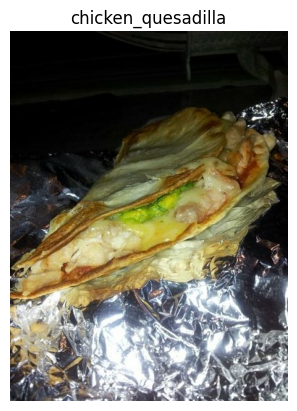

In [12]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])# Add title to image to verify the label is associated with the right image
plt.axis(False);

## Create preprocessing functions for our data
Neural networks perform best when data is in a certain way (e.g batched, normalized, etc).

However , not all data (including data from Tensorlow Datasets ) comes like this.

So in order to get it ready for a neural network, we'll often have to write preprocessing functions and map it to our data.

What we know about our data:
* In `unit8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better.

Since we're going to be using an **EfficientNetBX** pretrained model form tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in).

This means our functions needs to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors form `unit8` to `float32`



In [13]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from `unit8` -> `float32` and reshapes
    images to [img_shape, img_shape, colour_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape])  # reshape target image
    return tf.cast(image, tf.float32),label  # return (float32_image, label)


In [14]:
# Preprocess a single sample image and check the outputs
import tensorflow as tf
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  5]
  [11 11  9]
  [14 14 12]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 5  5  3]
  [ 8  8  6]
  [11 11  9]]]...,
Shape: (512, 384, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 7.7907934  7.7907934  5.7907934]
  [ 5.714286   5.714286   3.7142856]
  [10.999987  10.999987   8.999987 ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 6.770399   6.770399   4.770399 ]
  [ 6.790833   6.790833   4.790833 ]
  [10.1887665 10.1887665  8.1887665]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [15]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Batch & prepare datasets
We're now going to make our data input pipeline

In [132]:
# Map preprocessing function to training data (and parallelize Processor for efficient computing power)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)


# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)



In [17]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# Create modelling Callbacks
 * Callbacks are a tool which can **add helpful functionality** to our models during training,
 evaluation or inference

 * We are going to use TensorBoard callback to log training results(so that we can visualize them later if we need)
 * ModelCheckpoint callback to save our model's progress after feature extraction
  

In [18]:
# Create tensorboard callback
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instance to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [19]:
# Create ModelCheckpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)


## Setup mixed precison training

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.


In [20]:
# Turn on mixed precison training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

In [21]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extration model

In [22]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 2s 0us/step


In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

# Checking layer dtype policies

In [24]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [25]:
# Checking the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [26]:
mixed_precision.global_policy()

<Policy "mixed_float16">

 ## Fit the feature extraction model

 Our goal is to fine-tune a pretrained model, the general order of doing things is:
 1. Build a feature extraction model (train a couple output layers with base layers frozen)
 2. Fine tune some of the frozen layers


In [27]:
# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20231125-094835
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7194 - accuracy: 0.5815

2368/2368 [==============================] - 228s 86ms/step - loss: 1.7194 - accuracy: 0.5815 - val_loss: 1.1281 - val_accuracy: 0.7002
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2011 - accuracy: 0.6874

2368/2368 [==============================] - 201s 84ms/step - loss: 1.2011 - accuracy: 0.6874 - val_loss: 1.0352 - val_accuracy: 0.7222
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0549 - accuracy: 0.7240

2368/2368 [==============================] - 187s 78ms/step - loss: 1.0549 - accuracy: 0.7240 - val_loss: 0.9922 - val_accuracy: 0.7219


In [28]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 52s 66ms/step - loss: 0.9993 - accuracy: 0.7297


[0.9993009567260742, 0.7296633720397949]

In [29]:
model.save("Model_1_00.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# Load model previously saved above
import tensorflow as tf
loaded_saved_model = tf.keras.models.load_model("/content/Model_1_00.h5")

In [31]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <P

In [32]:
# Check loaded model performance
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)


790/790 [==============================] - 53s 64ms/step - loss: 0.9993 - accuracy: 0.7297


In [33]:
# The loaded model's results should equal (or at least be very close) to the model's results prior to saving
# Note: this will only work if you've instatiated results variables
import numpy as np
assert np.isclose(results_feature_extract_model, results_loaded_saved_model).all()

In [34]:
# Get a summary of our saved model
loaded_saved_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [36]:
# Are any of the layers in our model frozen?
for layer in loaded_saved_model.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure l

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [38]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling True float32 <Policy "mixed_float16">
normalization True float32 <Policy "mixed_float16">
rescaling_1 True float32 <Policy "mixed_float16">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_float

# Setting up early call_back

In [39]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [40]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [41]:
# Compile the model
loaded_saved_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [43]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune = loaded_saved_model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20231125-101100
Epoch 1/100
2368/2368 [==============================] - 460s 172ms/step - loss: 0.8681 - accuracy: 0.7652 - val_loss: 0.7583 - val_accuracy: 0.7895 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 374s 156ms/step - loss: 0.5395 - accuracy: 0.8507 - val_loss: 0.7655 - val_accuracy: 0.7926 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.3021 - accuracy: 0.9139
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 374s 156ms/step - loss: 0.3021 - accuracy: 0.9139 - val_loss: 0.8395 - val_accuracy: 0.7945 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 371s 155ms/step - loss: 0.0761 - accuracy: 0.9822 - val_loss: 0.9337 - val_accuracy: 0.8067 - lr: 2.0000e-05


In [44]:
loaded_saved_model.save("07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

# Trying another model


In [45]:

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB1(include_top=False)

# Input and Data Augmentation
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dropout(.3)(x)

x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax")(x)
model_1= tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

27018416/27018416 [==============================] - 2s 0us/step


In [46]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional  (None, None, None, 1280   6575239   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0   

In [49]:
# EarlyStopping Callback

early_stopping_callback = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3, verbose=1, monitor="val_accuracy")

In [51]:


# ReduceLROnPlateau Callback

lower_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                                monitor='val_accuracy',
                                                min_lr=1e-7,
                                                patience=0,
                                                verbose=1)

In [58]:

history = model_1.fit(train_data,
                    epochs=50,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15 * len(test_data)),
                    callbacks=[create_tensorboard_callback("training-logs", "EfficientNetB1-"),
                               early_stopping_callback,
                               lower_lr])

Saving TensorBoard log files to: training-logs/EfficientNetB1-/20231125-113901
Epoch 1/50
2368/2368 [==============================] - 644s 242ms/step - loss: 1.7594 - accuracy: 0.5538 - val_loss: 1.2086 - val_accuracy: 0.6743 - lr: 0.0010
Epoch 2/50
2368/2368 [==============================] - 573s 241ms/step - loss: 1.1444 - accuracy: 0.6949 - val_loss: 0.9103 - val_accuracy: 0.7466 - lr: 0.0010
Epoch 3/50
2368/2368 [==============================] - ETA: 0s - loss: 0.9325 - accuracy: 0.7469
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 [==============================] - 564s 237ms/step - loss: 0.9325 - accuracy: 0.7469 - val_loss: 0.9742 - val_accuracy: 0.7352 - lr: 0.0010
Epoch 4/50
2368/2368 [==============================] - 567s 239ms/step - loss: 0.4725 - accuracy: 0.8678 - val_loss: 0.5955 - val_accuracy: 0.8485 - lr: 2.0000e-04
Epoch 5/50
2368/2368 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.9153
Epoch 5: Re

In [59]:
# Saving the model
model_1.save("FoodVisionFinal.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


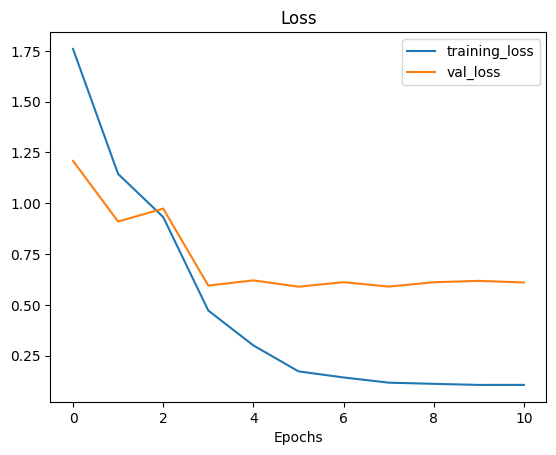

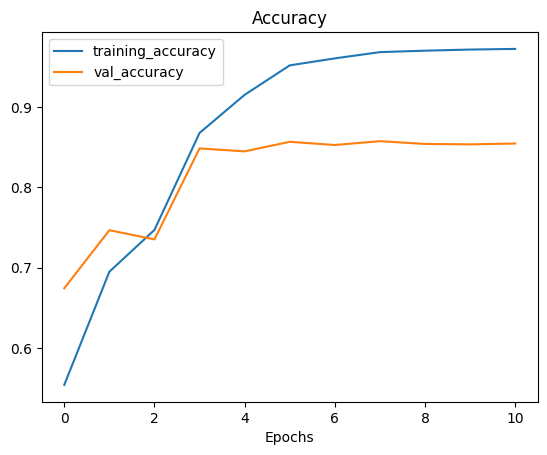

In [123]:
#plot loss curve
plot_loss_curves(history)

In [134]:
# Evaluate on complete test_data
model_1.evaluate(test_data)

790/790 [==============================] - 54s 68ms/step - loss: 0.6302 - accuracy: 0.8466


[0.6301897168159485, 0.8465742468833923]

# Evaluating the model

In [133]:
pred_probs = model_1.predict(test_data, verbose=1)
len(pred_probs), pred_probs.shape

790/790 [==============================] - 55s 70ms/step


(25250, (25250, 101))

In [135]:
pred_classes=pred_probs.argmax(axis=1)
pred_classes[:10], len(pred_classes), pred_classes.shape

(array([ 29,  81,  91,  53,  97,  97,  10,  31,   3, 100]), 25250, (25250,))

In [136]:
# Getting true labels for the test_data

y_labels = []
test_images = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy())
y_labels[:10]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [137]:
#predicted labels vs True labels
pred_classes==y_labels

array([ True,  True,  True, ...,  True,  True, False])

# Sklearn's Accuracy Score

In [138]:
from sklearn.metrics import accuracy_score

sklearn_acc=accuracy_score(y_labels, pred_classes)
sklearn_acc

0.8465742574257425

#Confusion Matrix

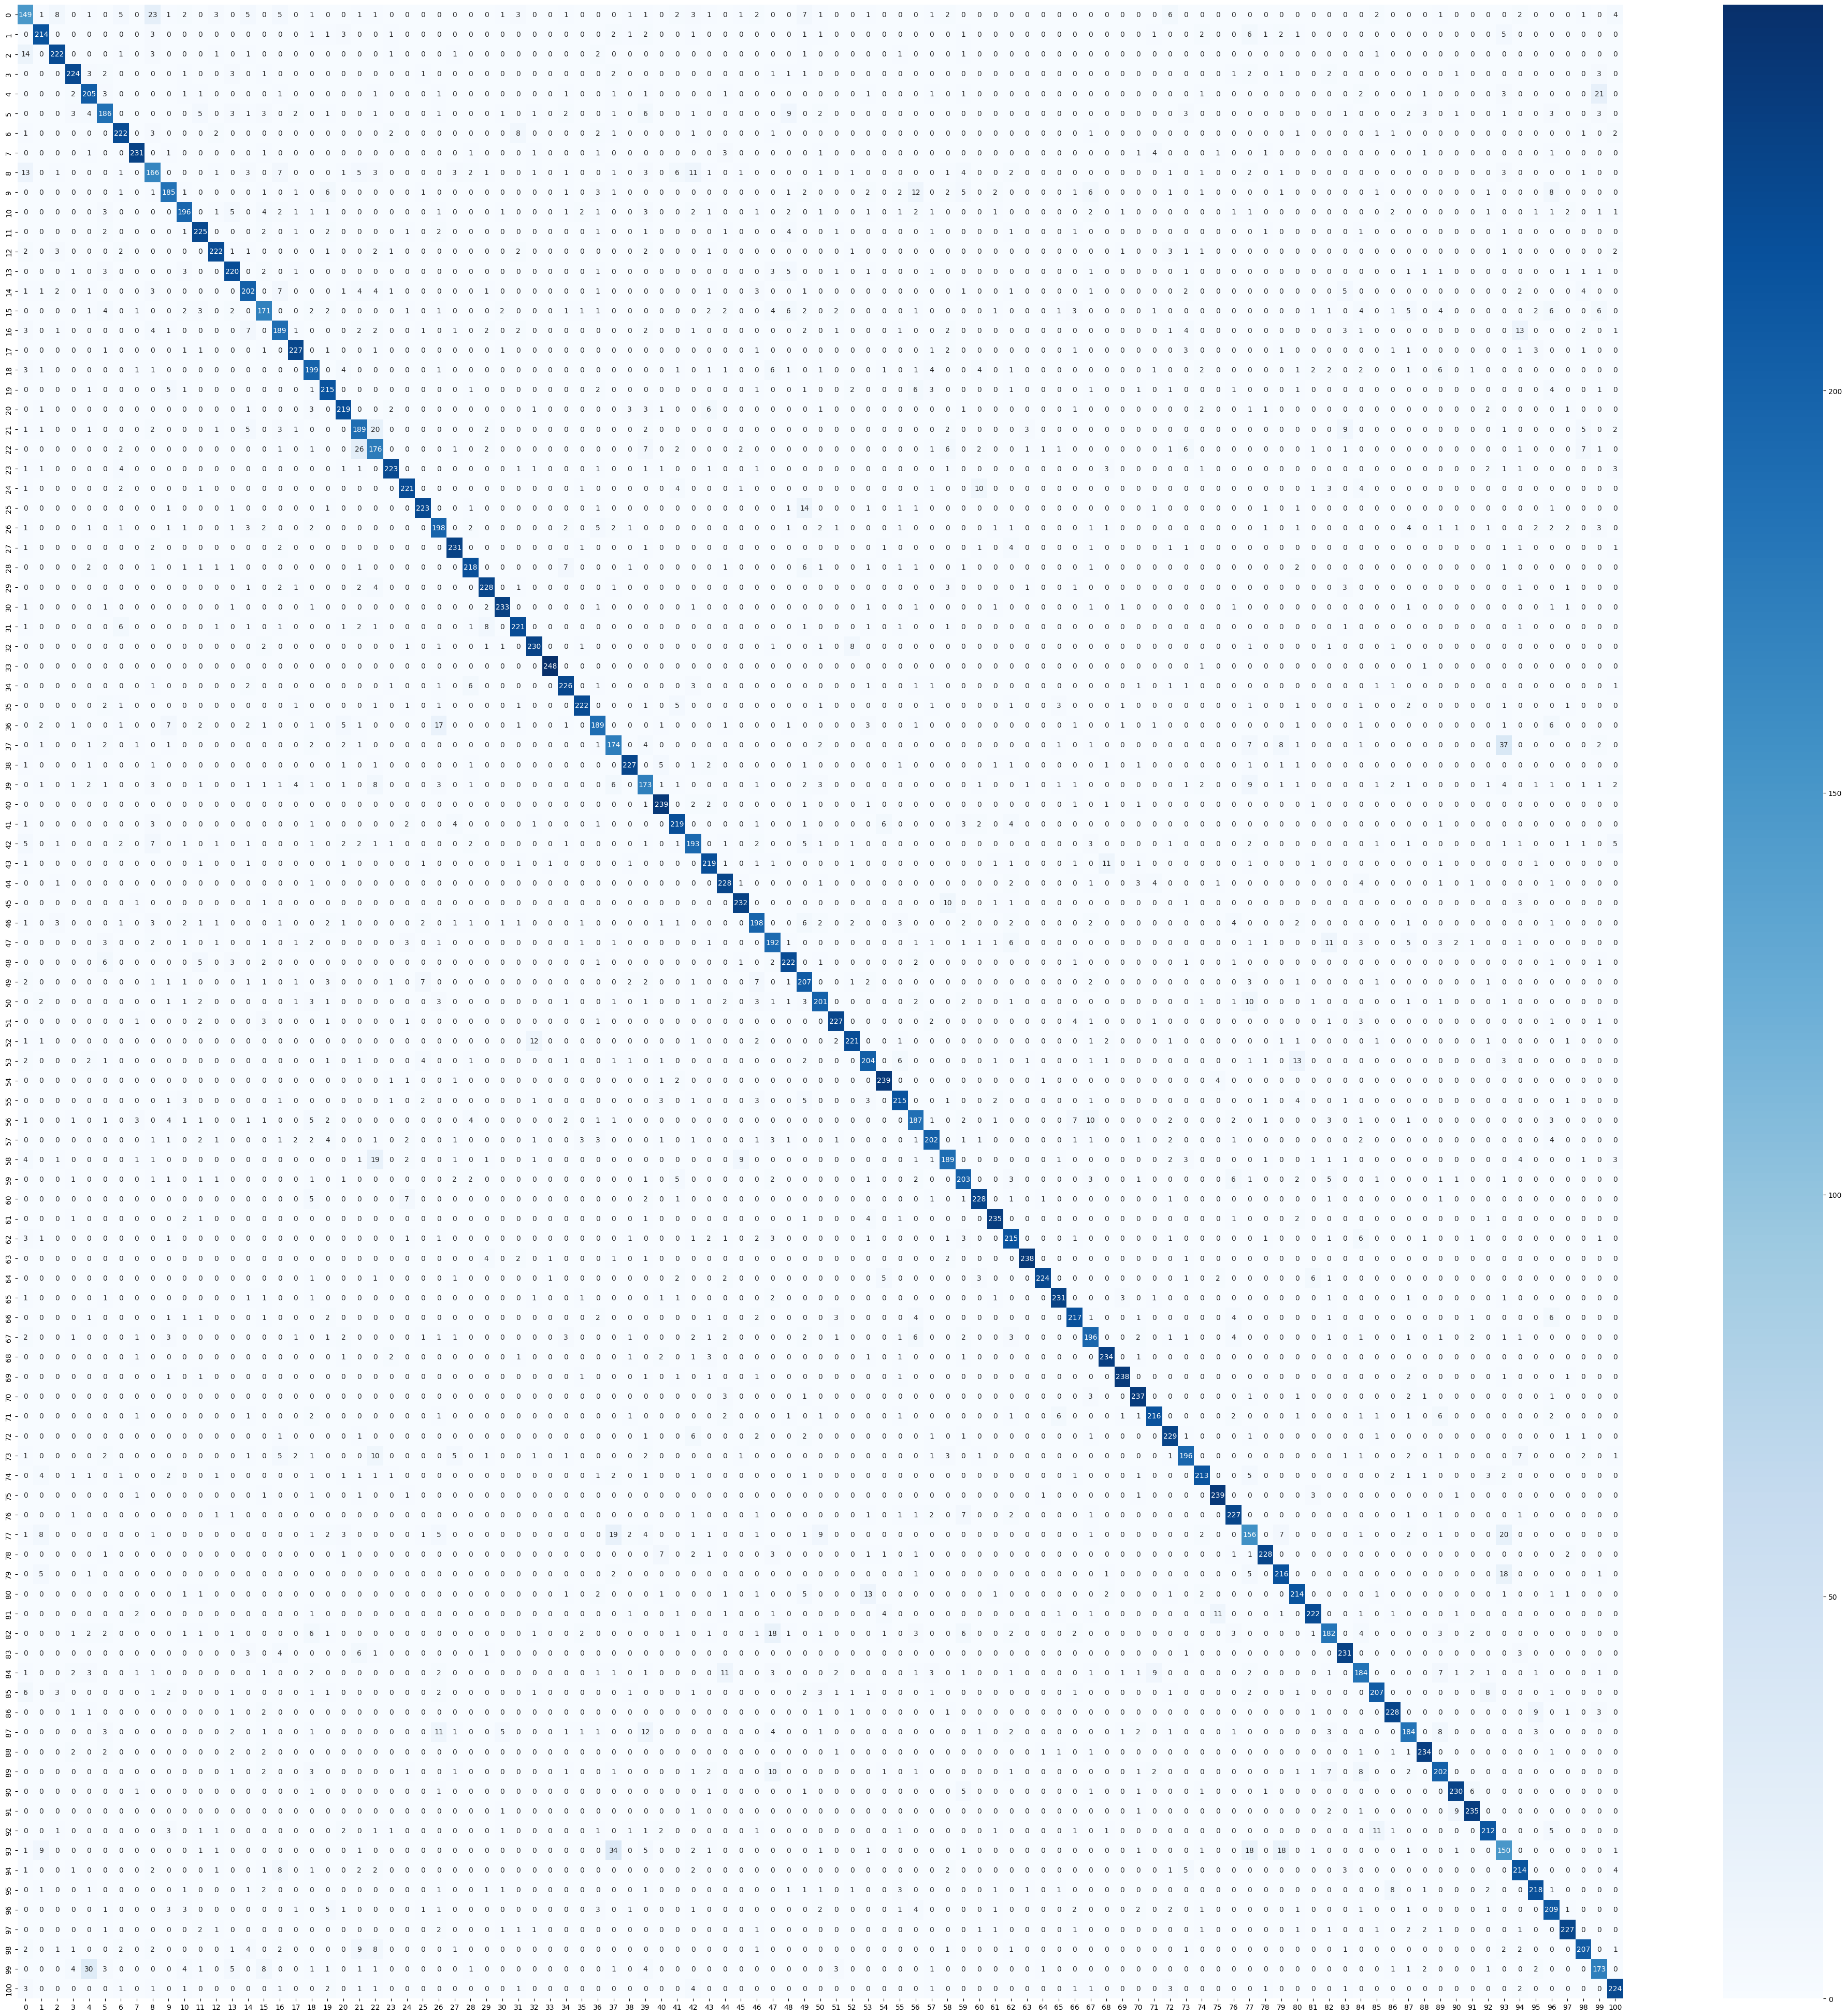

In [139]:
import seaborn as sn
cm=tf.math.confusion_matrix(y_labels, pred_classes)

plt.figure(figsize=(50,50));
sn.heatmap(cm, annot=True,
           fmt='',
           cmap='Blues');

#Model's Class-wise Accuracy Score

In [140]:
from sklearn.metrics import classification_report
report=(classification_report(y_labels, pred_classes, output_dict=True))

In [141]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in report.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.6157024793388429,
 'baby_back_ribs': 0.8475247524752475,
 'baklava': 0.891566265060241,
 'beef_carpaccio': 0.8960000000000001,
 'beef_tartare': 0.7930367504835589,
 'beet_salad': 0.7638603696098563,
 'beignets': 0.8774703557312253,
 'bibimbap': 0.927710843373494,
 'bread_pudding': 0.6720647773279351,
 'breakfast_burrito': 0.7740585774058577,
 'bruschetta': 0.8082474226804123,
 'caesar_salad': 0.8737864077669903,
 'cannoli': 0.8987854251012145,
 'caprese_salad': 0.8695652173913043,
 'carrot_cake': 0.8063872255489022,
 'ceviche': 0.7230443974630022,
 'cheesecake': 0.7636363636363637,
 'cheese_plate': 0.908,
 'chicken_curry': 0.77734375,
 'chicken_quesadilla': 0.8431372549019608,
 'chicken_wings': 0.8673267326732672,
 'chocolate_cake': 0.7382812500000001,
 'chocolate_mousse': 0.673040152963671,
 'churros': 0.9102040816326532,
 'clam_chowder': 0.8911290322580645,
 'club_sandwich': 0.9010101010101009,
 'crab_cakes': 0.7764705882352941,
 'creme_brulee': 0.9112426035502958,
 '

In [142]:
import pandas as pd
report_df=pd.DataFrame(class_f1_scores, index=['f1-score']).T

In [145]:
report_df = report_df.sort_values("f1-score",ascending=True)
report_df.head()

,f1-score
steak,0.584795
apple_pie,0.615702
pork_chop,0.635438
bread_pudding,0.672065
chocolate_mousse,0.673040


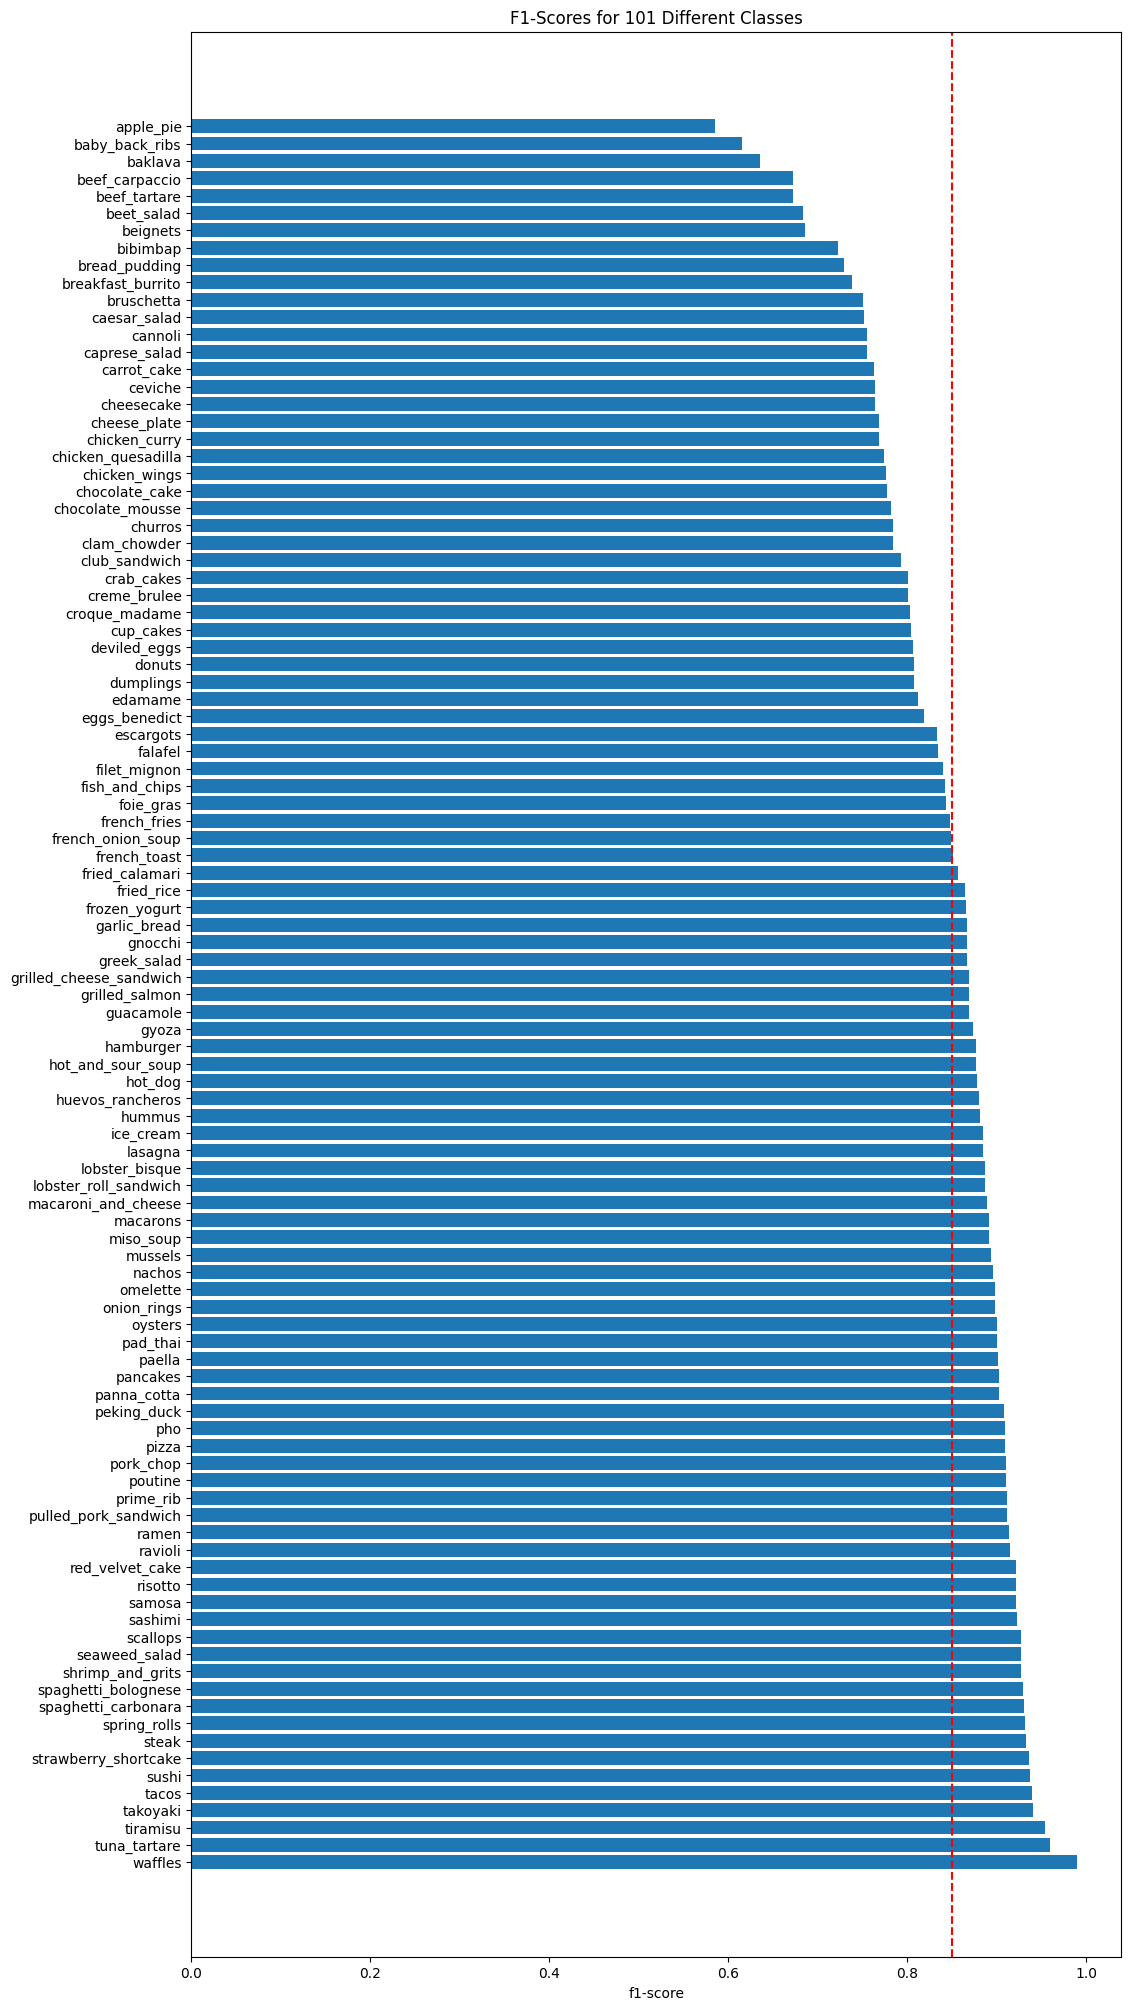

In [147]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(report_df)), report_df["f1-score"].values)
ax.set_yticks(range(len(report_df)))
plt.axvline(x=0.85, linestyle='--', color='r')
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 101 Different Classes")
ax.invert_yaxis(); # reverse the order

# Predicting on our Custom images

In [38]:
model_1 = tf.keras.models.load_model('/content/FoodVisionFinal.hdf5')

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [48]:
# Get custom food images filepaths
import os

custom_food_images=["/content/custom_data"+img_path for img_path in os.listdir("/content/custom_data")]
custom_food_images

['/content/custom_datadownload.jpeg',
 '/content/custom_data.ipynb_checkpoints',
 '/content/custom_dataimages.jpeg',
 '/content/custom_datadownload(2).jpeg',
 '/content/custom_datadownload(1).jpeg']

In [49]:
import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [60]:
def pred_plot_custom(folder_path):
  import os

  custom_food_images = [folder_path + '/' + img_path for img_path in os.listdir(folder_path)]
  i=0
  fig,a =  plt.subplots(len(custom_food_images),2, figsize=(15, 5*len(custom_food_images)))

  for img in custom_food_images:
    img = load_and_prep_image(img, scale=False)
    pred_prob = model_1.predict(tf.expand_dims(img, axis=0))
    print(pred_prob)
    print(pred_prob.argmax())

    pred_class = class_names[pred_prob.argmax()]
    print(pred_class)
    top_5_i = (pred_prob.argsort())[0][-5:][::-1]
    print(top_5_i)

    values = pred_prob[0][top_5_i]
    print(values)
    labels = []
    for x in range(5):
      labels.append(class_names[top_5_i[x]])

    # Plotting Image
    a[i][0].imshow(img/255.)
    a[i][0].set_title(f"Prediction: {pred_class}   Probability: {pred_prob.max():.2f}")
    a[i][0].axis(False)
    # Plotting Models Top 5 Predictions
    a[i][1].bar(labels, values, color='orange');
    a[i][1].set_title('Top 5 Predictions')
    i=i+1


1/1 [==============================] - 1s 977ms/step
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan]]
0
apple_pie
[100  36  26  27  28]
[nan nan nan nan nan]


FailedPreconditionError: ignored

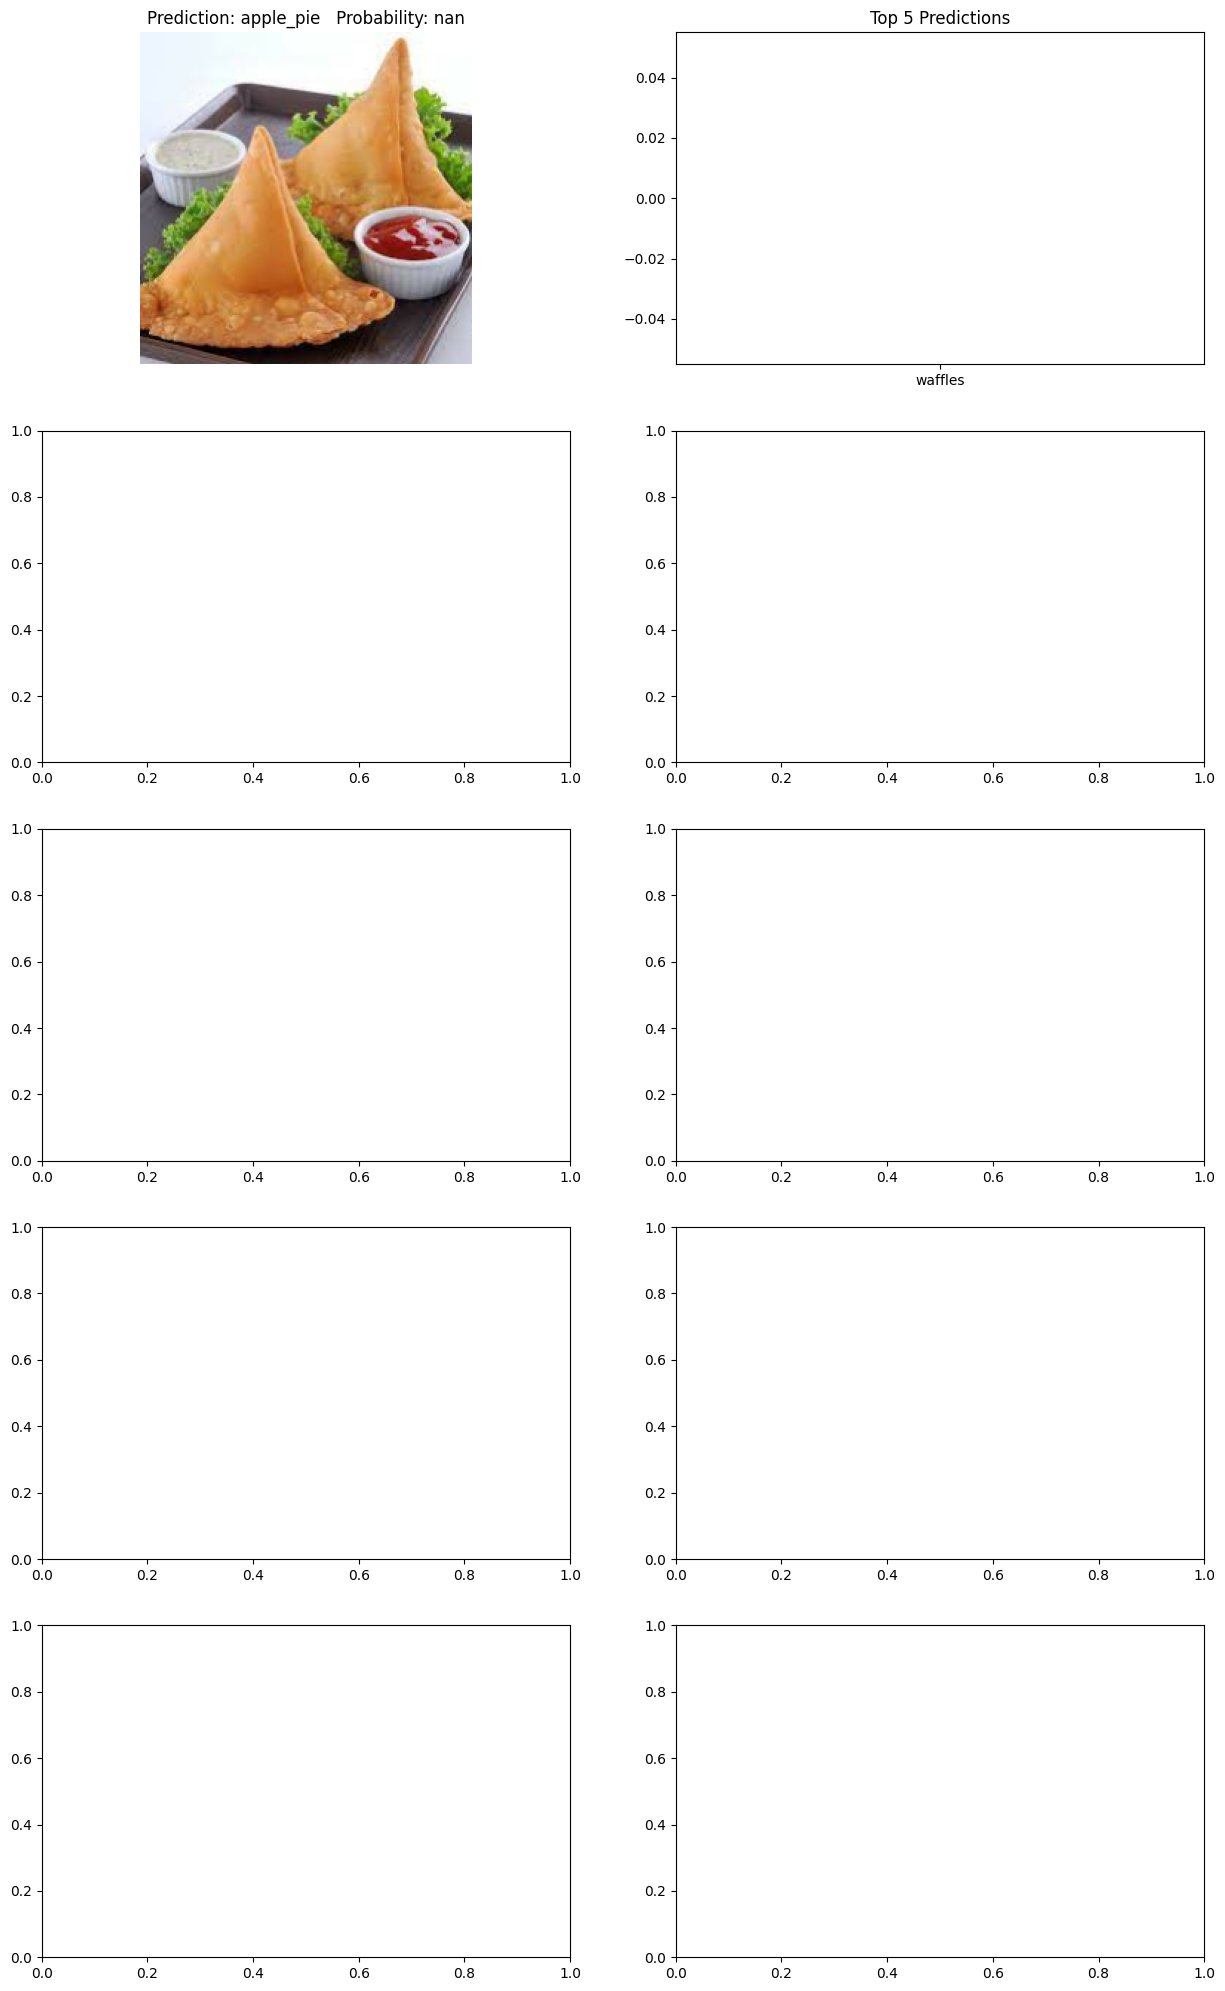

In [61]:
import matplotlib.pyplot as plt
pred_plot_custom("/content/custom_data")